In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import pmdarima
from pmdarima import auto_arima
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# Get data out of csv files and into the program
df_GDP_current = pd.read_csv("GDP (current US$).csv")
df_GDP_capita = pd.read_csv("GDP per capita (current US$).csv")
df_inflation = pd.read_csv("Inflation, consumer prices (annual %).csv")
df_total_pop = pd.read_csv("Total Population.csv")
df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")

In [3]:
# Function to filter out every country that is not Canada (37), China (40), France (77), U.S. (251)
def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df

In [4]:
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

In [5]:
# Slice each dataset to get data only from Canada, China, France, and U.S.
df_GDP_current = getImportantContries(df_GDP_current)
df_GDP_current.index = ['Canada', 'China', 'France', 'United States']


# Short Term Dataset
df_GDP_current_short_cut = dataframe_column_cutter(df_GDP_current,-12,-1)
df_GDP_current_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_GDP_current_short_cut = df_GDP_current_short_cut.T

In [6]:
two_yr_Canada_GDP_model = auto_arima(df_GDP_current_short_cut['Canada'], random_state = 20, trace = True)
two_yr_China_GDP_model = auto_arima(df_GDP_current_short_cut['China'], random_state = 20, trace = True)
two_yr_France_GDP_model = auto_arima(df_GDP_current_short_cut['France'], random_state = 20, trace = True)
two_yr_US_GDP_model = auto_arima(df_GDP_current_short_cut['United States'], random_state = 20, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=593.552, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=593.091, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=652.885, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=589.568, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=591.284, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=591.482, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=593.489, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.112 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=569.322, Time=0.08 sec
 ARIMA(1,1,0

In [7]:
two_yr_Canada_GDP_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -290.784
Date:                Mon, 06 Mar 2023   AIC                            589.568
Time:                        22:26:09   BIC                            591.160
Sample:                    01-01-2010   HQIC                           588.565
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.257e+12   1.49e-13   8.45e+24      0.000    1.26e+12    1.26e+12
ar.L1          0.9063      0.309      2.929      0.003       0.300       1.513
ar.L2         -0.6503      0.309     -2.104      0.035      -1.256      -0.044
sigma2      4.245e+21   7.17e-23   5.92e+43      0.000    4.25e+21    4.25e+21
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.43   Prob(JB):                         0.87
Heteroskedasticity (H):               0.21   Skew:                            -0.29
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.28e+59. Standard errors may be unstable.
"""

In [8]:
# Repeat this cell and the next one for the other three countries, if wanted
prediction = pd.Series(two_yr_Canada_GDP_model.predict(n_periods = 4))
prediction_index = []
for year in range(2021,2021+4):
    prediction_index.append(str(year))
prediction.index = prediction_index
joining_year = pd.Series(df_GDP_current_short_cut['Canada'][-1], index = ['2020'])
prediction = joining_year.append(prediction)
prediction

2020    1.650000e+12
2021    1.620954e+12
2022    1.653162e+12
2023    1.701240e+12
2024    1.723866e+12
dtype: float64

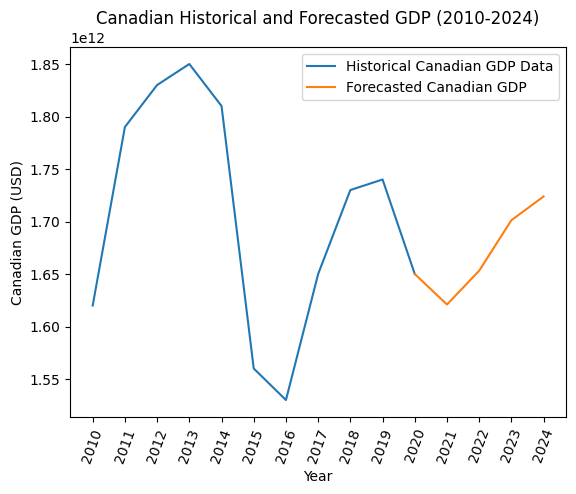

In [9]:
plt.plot(df_GDP_current_short_cut['Canada'], label='Historical Canadian GDP Data')
plt.plot(prediction, label='Forecasted Canadian GDP')
plt.title('Canadian Historical and Forecasted GDP (2010-2024)')
plt.xlabel('Year')
plt.xticks(rotation=70)
plt.ylabel('Canadian GDP (USD)')
plt.legend()
plt.savefig('Canada_GDP.jpg')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>